サポートベクター分類器

In [1]:
import numpy as np
np.random.seed(5)
X=np.random.randn(20,2)
y=np.repeat([1,-1],10)
X[y==-1]=X[y==-1]+1
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],s=70,c=y,cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
from lec12 import plot_svc

In [3]:
import os
#os.getcwd()
#os.listdir('.')

サポートベクター

In [4]:
from sklearn.svm import SVC
svc = SVC(C=1, kernel='linear')
svc.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

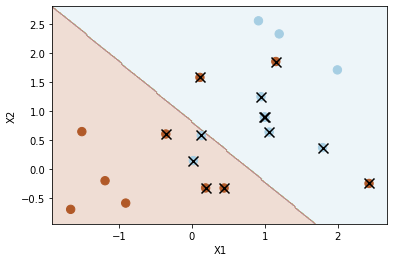

Number of support vectors:  13


In [5]:
plot_svc(svc, X, y)

In [6]:
#サポートベクターのインデックス、サポートベクター、サポートベクターの数
#svc.support_
#svc.support_vectors_
#svc.n_support_

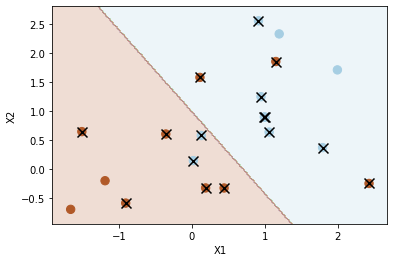

Number of support vectors:  16


In [7]:
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

交差検証

In [8]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters,cv=10, scoring='accuracy')
clf.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [9]:
#clf.cv_results_
clf.best_params_

{'C': 0.001}

In [10]:
np.random.seed(1)
X_test = np.random.randn(20, 2)
y_test = np.random.choice([-1, 1], 20)
X_test[y_test == 1] = X_test[y_test == 1] - 1

In [11]:
svc2 = SVC(C=0.001, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_test)
import pandas as pd
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_pred),index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,2,6
1,0,12


サポートベクターマシン

In [12]:
from sklearn.model_selection import train_test_split
np.random.seed(8)
X = np.random.randn(200, 2)
X[:100] = X[:100] + 2
X[101:150] = X[101:150] - 2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5,random_state=2)

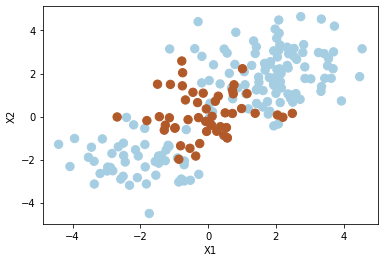

In [13]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

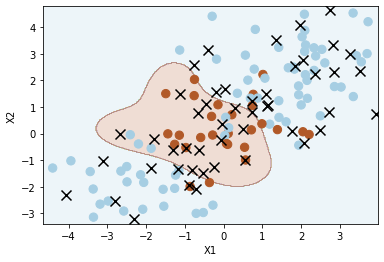

Number of support vectors:  51


In [14]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)
plot_svc(svm, X_test, y_test)

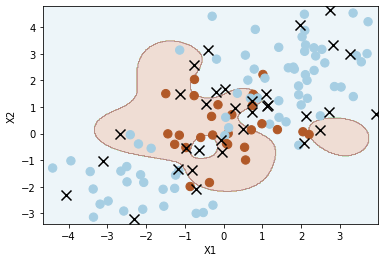

Number of support vectors:  36


In [15]:
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)
plot_svc(svm2, X_test, y_test)

In [16]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10,scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_

/Users/nishiyamaakito/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1, 'gamma': 0.5}

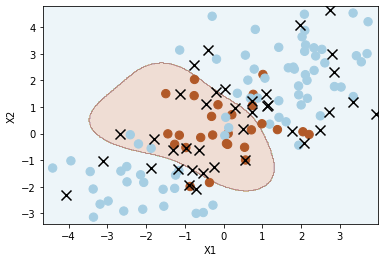

Number of support vectors:  41


0.85

In [19]:
plot_svc(clf.best_estimator_, X_test, y_test)
confusion_matrix(y_test, clf.best_estimator_.predict(X_test))
clf.best_estimator_.score(X_test, y_test)

In [22]:
import sklearn
print(sklearn.__version__)

0.21.2
